In [29]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [30]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [31]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions = list(emotions.values())
print(observed_emotions)

['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']


In [32]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("./speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [33]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

#DataFlair - Train the model
model.fit(x_train,y_train)

(1080, 360)
Features extracted: 180


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [34]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 48.89%


In [35]:
test_audio = "./speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"
# file = glob.glob(test_audio)
feature=extract_feature(test_audio, mfcc=True, chroma=True, mel=True).reshape(1,-1)
# print(feature)

In [36]:
pred = model.predict(feature)
# print(pred)

In [37]:
import subprocess
input_file = "input.mp3"
subprocess.call(['ffmpeg', '-i', input_file,
                   'new_input.wav', '-y'])

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

0

In [38]:
test_audio = "./new_input.wav"
# file = glob.glob(test_audio)
feature=extract_feature(test_audio, mfcc=True, chroma=True, mel=True).reshape(1,-1)
# print(feature)

In [39]:
prediction = model.predict(feature)
print(prediction)

['angry']


/home/overlord468/.local/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=810
  warnings.warn(
/home/overlord468/.local/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=405
  warnings.warn(


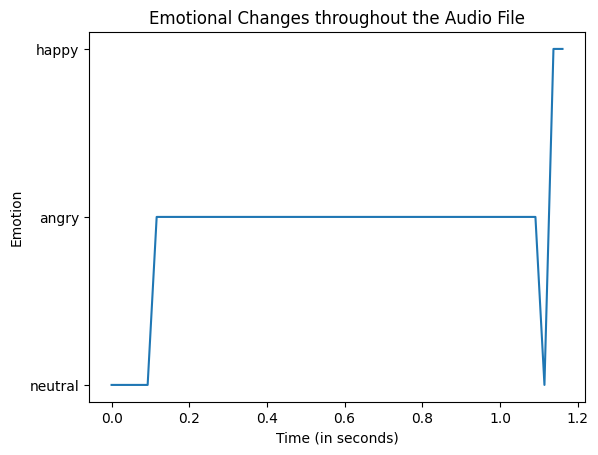

In [41]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_file = "./input.mp3"

# Check if audio file is empty
if np.abs(librosa.get_duration(path=audio_file)) < 1e-3:
    print("Error: Empty audio file")
else:
    # Load audio waveform
    y, sr = librosa.load(audio_file)

    # Apply emotion detection
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=75, fmax=300, threshold=0.1)
    pitch_mean = np.mean(pitches, axis=0)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    energy = librosa.feature.rms(y=y)[0]
    tone = librosa.feature.tonnetz(y=y, sr=sr)

    # Map pitch, energy, and tone values to emotions
    emotions = []
    timestamp = []
    for i, pitch in enumerate(pitch_mean):
        timestamp.append(librosa.frames_to_time(i, sr=sr))
        if pitch < 110 and energy[i] < 0.02 and np.max(mel_spec[:, i]) < 0.0001:
            emotions.append("sad")
        elif pitch < 110 and energy[i] >= 0.02:
            emotions.append("angry")
        elif pitch < 130 and tone[0, i] > 0:
            emotions.append("happy")
        elif pitch < 130 and tone[0, i] <= 0:
            emotions.append("neutral")
        else:
            emotions.append("happy")

    # Plot emotional changes
    plt.plot(timestamp, emotions)
    plt.xlabel('Time (in seconds)')
    plt.ylabel('Emotion')
    plt.title('Emotional Changes throughout the Audio File')
    plt.show()
